Importing libraries from Python

In [204]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #data spliter
from sklearn.linear_model import LinearRegression #Linear Regression library
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression library
from sklearn.neighbors import KNeighborsClassifier #Decision Tree Regression library
from sklearn.calibration import LabelEncoder #encode data from string to numeric format
from sklearn.preprocessing import StandardScaler # standardize data with a mean of 0 and standard deviation of 1
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from datetime import datetime
from sklearn.metrics import accuracy_score, classification_report

Importing the data

In [205]:
path = './Melbourne_housing.csv'
melb_data = pd.read_csv(path)

/var/folders/3_/xgxsb89j1bj8c43wlysd6g4w0000gn/T/ipykernel_16381/4092401923.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  melb_data = pd.read_csv(path)


Data Pre_Processing

In [206]:
#dropping rows having null values from the dataset
melb_data.dropna(inplace=True)
# Create a new column 'age' by subtracting 'yearbuilt' from the current year
current_year = datetime.now().year
melb_data['Age'] = current_year - melb_data['YearBuilt']
#Dropping unnecessary columns for this project ( YearBuilt and Postcode)
melb_data=melb_data.drop(['YearBuilt'],axis=1).drop(['Postcode'],axis=1).drop(['BuildingArea'],axis=1)
# Feature Engineering: Adding BedroomRatio
melb_data['BedroomRatio']=melb_data['Bedroom']/ melb_data['Rooms']

#Removing the outliers from the dataset
Q1 = melb_data['Price'].quantile(0.25)
Q2 = melb_data['Price'].quantile(0.5)
Q3 = melb_data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)
print(lower_bound)



outliers = melb_data[(melb_data['Price'] < lower_bound) | (melb_data['Price'] > upper_bound)]
for price in outliers['Price'].tolist():
    melb_data = melb_data[melb_data['Price'] != price]

melb_data.to_csv('preprocessed_melb_data.csv', index=False)

outliers = melb_data[(melb_data['Price'] < lower_bound) | (melb_data['Price'] > upper_bound)]
print("Outliers:", outliers['Price'].tolist())

2401000.0
-415000.0
Outliers: []


Data Visualization

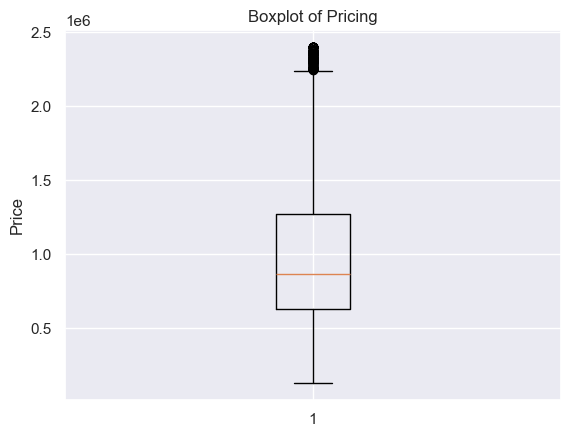

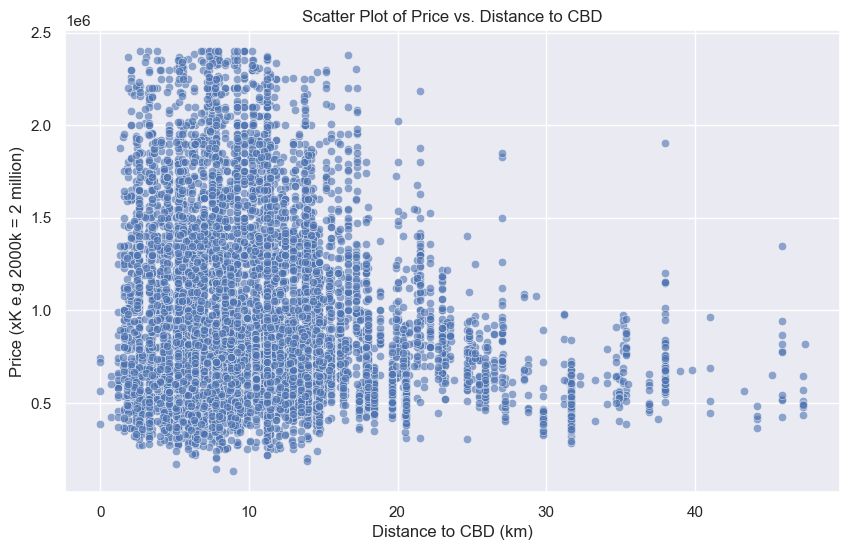

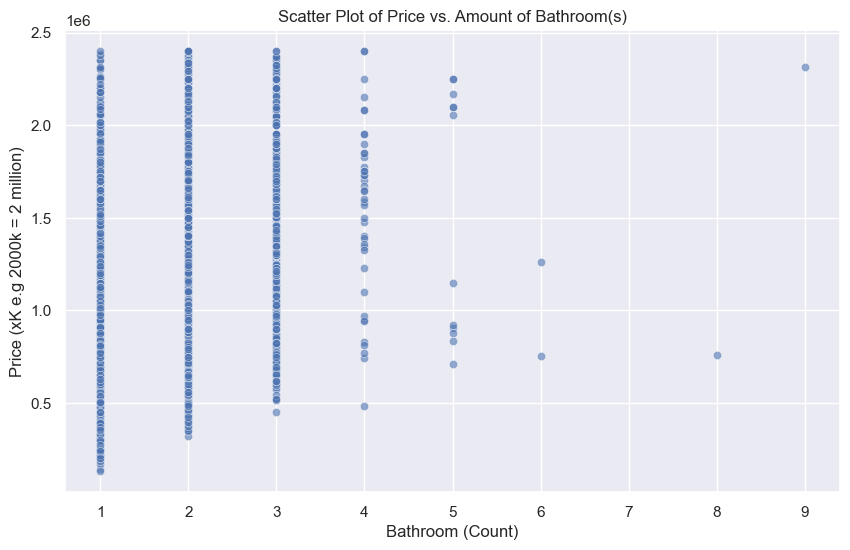

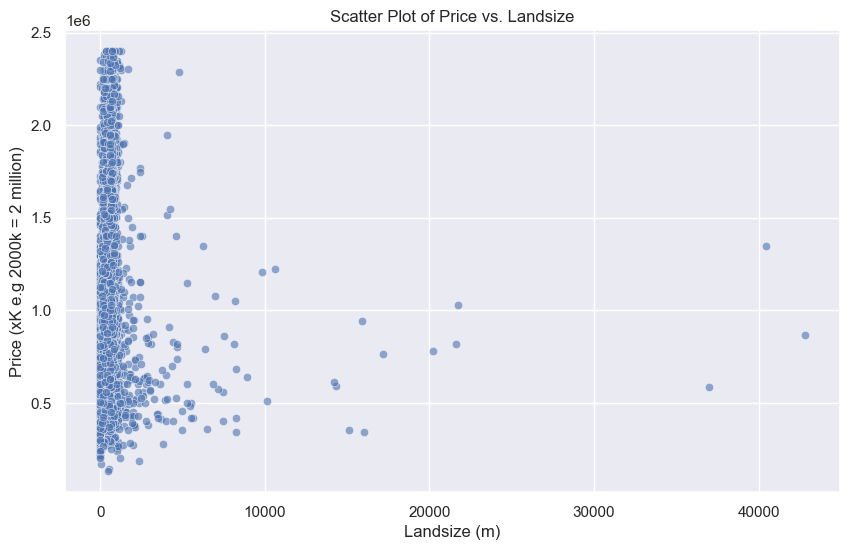

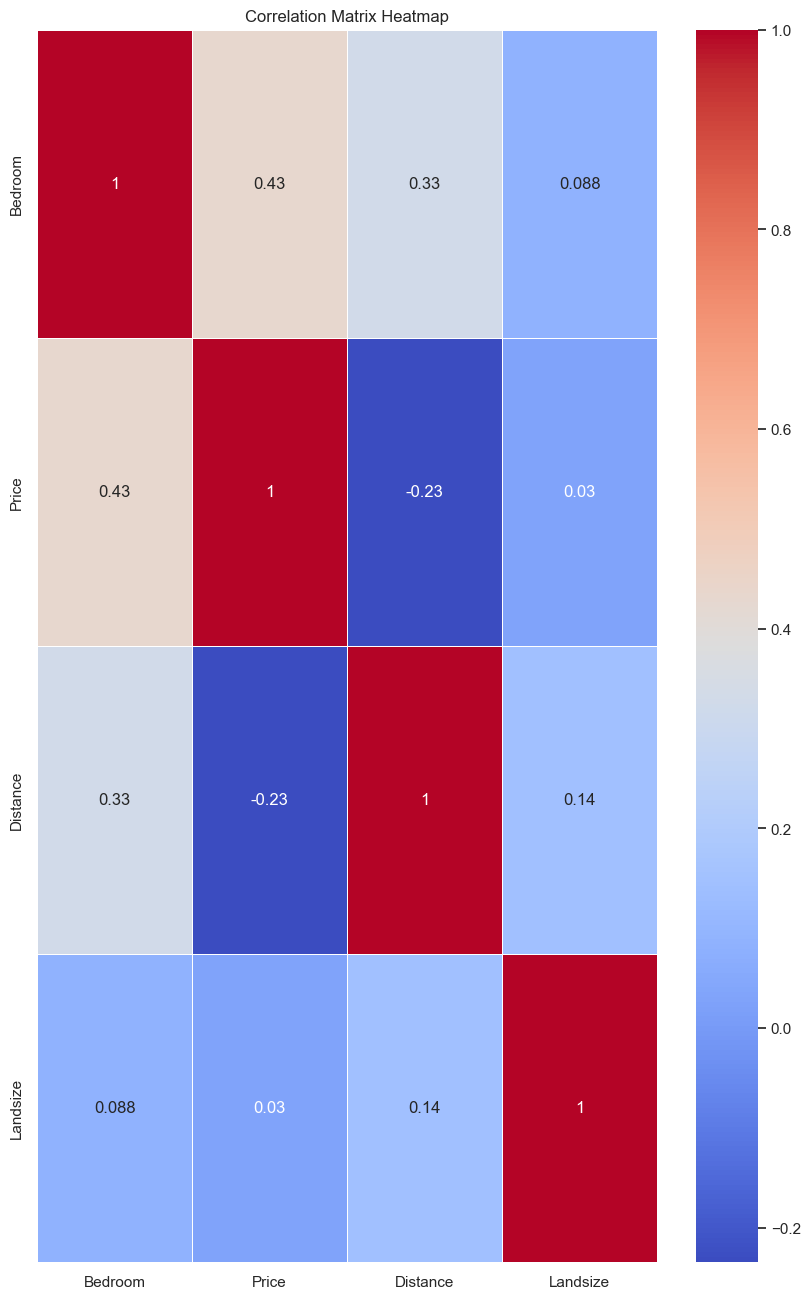

In [196]:


#plotting boxplot of Price
plt.boxplot(melb_data['Price'])
# adding title and labels
plt.title('Boxplot of Pricing')
plt.ylabel('Price')
plt.show()

# scatter plot - DistanceToCBD and Price
# plotting

plt.figure(figsize=(10, 6)) # set the size of the plot
sns.scatterplot(data=melb_data, x='Distance', y='Price', alpha=0.6)
# adding title and labels
plt.title('Scatter Plot of Price vs. Distance to CBD')
plt.xlabel('Distance to CBD (km)')
plt.ylabel('Price (xK e.g 2000k = 2 million)')
plt.grid(True)
plt.show()

# scatter plot - Bathroom and Price
# plotting
plt.figure(figsize=(10, 6))  # set the size of the plot
sns.scatterplot(data=melb_data, x='Bathroom', y='Price', alpha=0.6)
# adding title and labels
plt.title('Scatter Plot of Price vs. Amount of Bathroom(s)')
plt.xlabel('Bathroom (Count)')
plt.ylabel('Price (xK e.g 2000k = 2 million)')
plt.grid(True)
plt.show()

# scatter plot - Landsize and price
# plotting
plt.figure(figsize=(10, 6))  # set the size of the plot
sns.scatterplot(data=melb_data, x='Landsize', y='Price', alpha=0.6)
# adding title and labels
plt.title('Scatter Plot of Price vs. Landsize')
plt.xlabel('Landsize (m)')
plt.ylabel('Price (xK e.g 2000k = 2 million)')
plt.grid(True)
plt.show()


# plot heatmap
num_cols = ['Bedroom', 'Price', 'Distance', 'Landsize']
test = melb_data[num_cols]

plt.figure(figsize=(10, 16)) #set the size of the plot
corr_matrix = test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#adding title
plt.title('Correlation Matrix Heatmap')
plt.show()

Machine Learning Model - Linear Regression

Features included: All features except from YearBuilt, Postcode, and all Strings value columns such as Council, Type,...
Target included: Price

Note: 

Mean Squared Error: 91002224247.50
R^2 Score: 0.58
MAE: 225455.17
Mean Squared Error for DecisionTree model: 73173906224.05
R^2 Score: 0.66
MAE: 186980.86


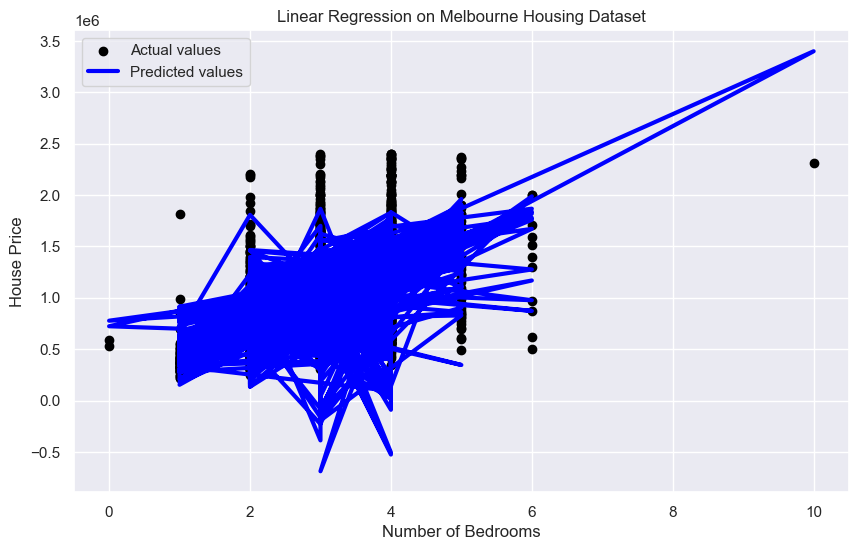

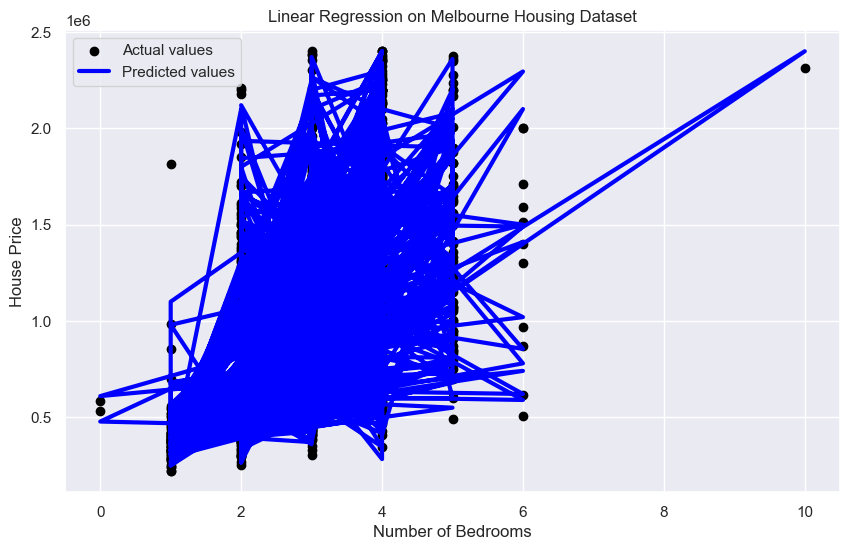

Mean Squared Error of New Data: 0.50


In [201]:
#exclude string data from the datasets
# melb_data=melb_data.select_dtypes(exclude=[object])

#setting features and target
X=melb_data.drop(['Price'],axis=1)
y=melb_data['Price']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Join training datasets
train_data=X_train.join(y_train)
train_data=train_data.select_dtypes(exclude=[object])

#make data for these 2 columns normally distributed (not skewed) to improve performance of model
train_data['Landsize']=np.log(train_data['Landsize']+1)
train_data['Age']=np.log(train_data['Age']+1)


#Separate into features and targets again
X_train,y_train=train_data.drop(['Price'],axis=1), train_data['Price']

#creating 2 Regression models: linear and DecisionTree
reg=LinearRegression()
reg2=DecisionTreeRegressor()

#Putting data into models
reg.fit(X_train,y_train)
reg2.fit(X_train,y_train)

#Join testing datasets
test_data=X_test.join(y_test)
#make data for these 2 columns normally distributed (not skewed) to improve performance of model
test_data=test_data.select_dtypes(exclude=[object])

test_data['Landsize']=np.log(test_data['Landsize']+1)
test_data['Age']=np.log(test_data['Age']+1)


#Separate into features and targets again
X_test,y_test=test_data.drop(['Price'],axis=1),test_data['Price']

#Predicting results
y_pred = reg.predict(X_test)
y_pred2=reg2.predict(X_test)

#Outputting metrics for 2 models
# #Linear Regression
 
print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 Score: %.2f' % r2_score(y_test, y_pred))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
#DecisionTree
print('Mean Squared Error for DecisionTree model: %.2f' % mean_squared_error(y_test, y_pred2))
print('R^2 Score: %.2f' % r2_score(y_test, y_pred2))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred2))

#Outputting visualization of predictions for 2 models 
#Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Bedroom'], y_test, color='black', label='Actual values')
plt.plot(X_test['Bedroom'], y_pred, color='blue', linewidth=3, label='Predicted values')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title('Linear Regression on Melbourne Housing Dataset')
plt.legend()
plt.show() 
#DecisionTree
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Bedroom'], y_test, color='black', label='Actual values')
plt.plot(X_test['Bedroom'], y_pred2, color='blue', linewidth=3, label='Predicted values')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title('Linear Regression on Melbourne Housing Dataset')
plt.legend()
plt.show() 

new_data = pd.read_csv('./melb_data (2).csv')
new_data.dropna(inplace=True)
current_year = datetime.now().year
new_data=new_data.select_dtypes(exclude=[object])
new_data['Age'] = current_year - new_data['YearBuilt']
#Dropping unnecessary columns for this project ( YearBuilt and Postcode)
new_data=new_data.drop(['YearBuilt'],axis=1).drop(['Postcode'],axis=1).drop(['BuildingArea'],axis=1)
# Feature Engineering: Adding BedroomRatio
new_data['BedroomRatio']=new_data['Bedroom']/ new_data['Rooms']

new_data['Landsize']=np.log(new_data['Landsize']+1)
new_data['Age']=np.log(new_data['Age']+1)

X_test2,y_test2=new_data.drop(['Price'],axis=1),new_data['Price']
y_pred3=reg.predict(X_test2)
print('Mean Squared Error of New Data: %.2f' % r2_score(y_test2, y_pred3))



Machine Learning Model - KNN Classification Model

Features included: All features except from YearBuilt, Postcode, and all Strings value columns such as Council, Type,...
Target included: Price

Note: This machine learning used to categorize price into High, Medium or Low

Acc Score: 0.75


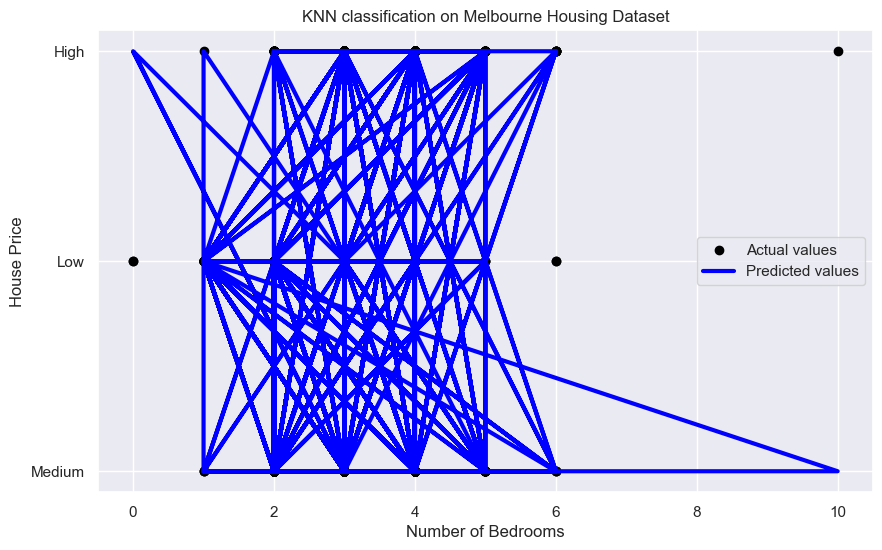

Acc Score of New Data: 0.81


In [203]:
#Feature Engineering: Adding PriceCategory into dataset
melb_data['PriceCategory'] = pd.cut(melb_data['Price'], 
                                   bins=[-np.inf, Q1, Q3, np.inf], 
                                   labels=['Low', 'Medium', 'High'])
#Setting features and target
X = melb_data.drop(['Price', 'PriceCategory','ParkingArea'], axis=1)
y = melb_data['PriceCategory']

#Standardize non-numeric data
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Setting Scaler
scaler = StandardScaler()
#Redistributing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Setting model 
reg=KNeighborsClassifier(n_neighbors=5)
#Putting data into model
reg.fit(X_train_scaled,y_train)

# Join testing dataset
test_data=X_test.join(y_test)

#making predictions
y_pred = reg.predict(X_test_scaled)

#Outputting metrics for KNN model
print('Acc Score: %.2f' % accuracy_score(y_test, y_pred))

#Outputting visualization for KNN Model Prediction
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Bedroom'], y_test, color='black', label='Actual values')
plt.plot(X_test['Bedroom'], y_pred, color='blue', linewidth=3, label='Predicted values')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title('KNN classification on Melbourne Housing Dataset')
plt.legend()
plt.show() 

new_data = pd.read_csv('./melb_data (2).csv')
new_data.dropna(inplace=True)
current_year = datetime.now().year
new_data['Age'] = current_year - new_data['YearBuilt']
#Dropping unnecessary columns for this project ( YearBuilt and Postcode)
new_data=new_data.drop(['YearBuilt'],axis=1).drop(['Postcode'],axis=1).drop(['BuildingArea'],axis=1)
# Feature Engineering: Adding BedroomRatio
new_data['BedroomRatio']=new_data['Bedroom']/ new_data['Rooms']

Q1 = new_data['Price'].quantile(0.25)
Q2 = new_data['Price'].quantile(0.5)
Q3 = new_data['Price'].quantile(0.75)

new_data['PriceCategory'] = pd.cut(new_data['Price'], 
                                   bins=[-np.inf, Q1, Q3, np.inf], 
                                   labels=['Low', 'Medium', 'High'])


X_test2,y_test2=new_data.drop(['Price','PriceCategory'],axis=1),new_data['PriceCategory']

for column in X_test2.columns:
    if X_test2[column].dtype == 'object':
        le = LabelEncoder()
        X_test2[column] = le.fit_transform(X_test2[column])
X_test_scaled2=scaler.transform(X_test2)

y_pred3=reg.predict(X_test_scaled2)
print('Acc Score of New Data: %.2f' % accuracy_score(y_test2, y_pred3))
